# **Installing the right Depdencies**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snas
import nltk
from nltk.corpus import stopwords
nltk.download("all")
import seaborn as sns



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
# might put this csv file on hold
from google.colab import files
upload = files.upload()
df = pd.read_csv('curated_set.csv') # write the file name string form in the
#spam_email = 'https://github.com/sadat1971/Phishing_Email/blob/main/Data/curated_set.csv'
# remove the dash for the thing to run

Saving curated_set.csv to curated_set.csv


# **General Insight into the Code**

In [ ]:
print(df)

     Unnamed: 0                                               text  \
0             0  Subject: ena offsite\nmy suggestions :\n1 ) mo...   
1             1  Subject: allegheny energy s - 3\ni received wo...   
2             2  The University of Washington System is sharing...   
3             3  Dear user@stanford.edu,\n\nA private document ...   
4             4  Subject: james valverde - interview schedule\n...   
..          ...                                                ...   
321         321  Subject: oto\ni will be out of the office from...   
322         322  Subject: calpine daily gas nomiantion\nper our...   
323         323  Dear Colleague,\nLehigh University have upgrad...   
324         324  Linkedin Important Profile Changes.\nJust clic...   
325         325  <Name>,\n\nAre you at your desk? I need you to...   

                                                source  is_phishing  
0                                                ENRON            0  
1                  

Cleaning the data.

In [ ]:
# run this program to see a overview of the code, just to make sure there is no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   326 non-null    int64 
 1   text         326 non-null    object
 2   source       326 non-null    object
 3   is_phishing  326 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.3+ KB


In [ ]:
df.notnull()

,Unnamed: 0,text,source,is_phishing
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
321,True,True,True,True
322,True,True,True,True
323,True,True,True,True
324,True,True,True,True


In [ ]:
df.head(5)


,Unnamed: 0,text,source,is_phishing
0,0,Subject: ena offsite\nmy suggestions :\n1 ) mo...,ENRON,0
1,1,Subject: allegheny energy s - 3\ni received wo...,ENRON,0
2,2,The University of Washington System is sharing...,https://ciso.uw.edu/education/more-phishing-ex...,1
3,3,"Dear user@stanford.edu,\n\nA private document ...",https://uit.stanford.edu/phishing,1
4,4,Subject: james valverde - interview schedule\n...,ENRON,0


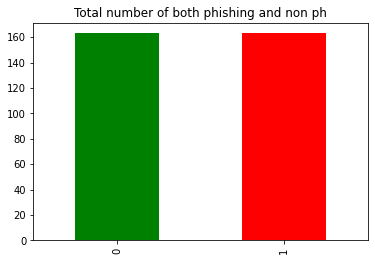

In [ ]:
df['is_phishing'].value_counts().plot.bar(color = ["g","r"])
plt.title('Total number of both phishing and non phishing')
plt.show()

In [ ]:

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
321    False
322    False
323    False
324    False
325    False
Length: 326, dtype: bool

***A perview of NLP***

In [ ]:
df['text'].apply(lambda x:nltk.word_tokenize((x)))

# getting the words to being broken into


0      [Subject, :, ena, offsite, my, suggestions, :,...
1      [Subject, :, allegheny, energy, s, -, 3, i, re...
2      [The, University, of, Washington, System, is, ...
3      [Dear, user, @, stanford.edu, ,, A, private, d...
4      [Subject, :, james, valverde, -, interview, sc...
                             ...                        
321    [Subject, :, oto, i, will, be, out, of, the, o...
322    [Subject, :, calpine, daily, gas, nomiantion, ...
323    [Dear, Colleague, ,, Lehigh, University, have,...
324    [Linkedin, Important, Profile, Changes, ., Jus...
325    [<, Name, >, ,, Are, you, at, your, desk, ?, I...
Name: text, Length: 326, dtype: object

**In Depth view of NPL **

In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import string
nltk.download('stopwords')
def process_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)
  return y
   # if i.isn
  #eturn text

NameError: ignored

In [ ]:
# testing the merge of the words
process_text("how are you person ! * ")

['person']

In [ ]:
#examples of the words being tokenized
process_text("Hi, how are you")

['hi']

In [ ]:
df['text'].head().apply(process_text)

0    [subject, ena, offsite, suggestions, 1, mounta...
1    [subject, allegheny, energy, 3, received, word...
2    [university, washington, system, sharing, fund...
3    [dear, user, private, document, sent, human, r...
4    [subject, james, valverde, interview, schedule...
Name: text, dtype: object

In [ ]:
# removing any terms that don't fall under the terms
# using stopwords mean we remove any words that are useless


**Building the model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
email_dect = CountVectorizer(analyzer = process_text).fit_transform(df['text'])



In [ ]:
#anyone can jump in this one
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(email_dect, df["is_phishing"])


In [ ]:
# good idea to check the rows and column in the datasets
email_dect.shape

(326, 5685)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, Y_train)

In [ ]:
print(classifier.predict(X_train)) # being used to predict the target set

[0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1
 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0
 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1]


In [ ]:
print(Y_train.values)

[0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1
 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0
 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1]


Evaluating the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predicting_varaible = classifier.predict(X_train)
print(classification_report(Y_train, predicting_varaible))
print()
print()

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       125
           1       0.99      1.00      1.00       119

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244





In [ ]:
print("this is the accuracy", accuracy_score(Y_train, predicting_varaible))

this is the accuracy 0.9959016393442623


In [ ]:
print("our Confusion Matrix", confusion_matrix(Y_train, predicting_varaible))

our Confusion Matrix [[124   1]
 [  0 119]]
